# Population Growth Analysis

Analysis of historical population data for top cities in China, India, and United States (1950-2035).

## Data Overview
- **150 cities** total (50 from each country)
- **86 years** of historical data per city (1950-2035)
- **~12,900 total data points**

## Analysis Goals
1. Identify the **top 3 fastest growing cities** over the entire time period
2. Find the **top 3 fastest single-year growth rates** across all cities
3. Visualize growth patterns and trends


In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📊 Libraries imported successfully!")


Matplotlib is building the font cache; this may take a moment.


📊 Libraries imported successfully!


In [2]:
# Load the population data
with open('data/cities_data_full.json', 'r') as f:
    cities_data = json.load(f)

print("🔍 Data loaded successfully!")
print(f"Countries: {list(cities_data.keys())}")
print(f"Total cities: {sum(len(cities) for cities in cities_data.values())}")

# Display sample city data
sample_city = cities_data['china'][0]
print(f"\n📍 Sample city: {sample_city['name']}")
print(f"   Country: {sample_city['country']}")
print(f"   Historical data points: {sample_city['years_available']}")
print(f"   Current population: {sample_city.get('current_population', 'N/A'):,}")
print(f"   Data range: {min(sample_city['population_history'].keys())} - {max(sample_city['population_history'].keys())}")


🔍 Data loaded successfully!
Countries: ['china', 'india', 'united_states']
Total cities: 150

📍 Sample city: Shanghai29 M
   Country: china
   Historical data points: 86
   Current population: 34,341,000
   Data range: 1950 - 2035


In [3]:
def prepare_data_for_analysis(cities_data: Dict) -> pd.DataFrame:
    """Convert cities data to a structured DataFrame for analysis"""
    
    all_city_records = []
    
    for country, cities in cities_data.items():
        for city in cities:
            # Extract basic city info
            city_name = city['name'].replace('29 M', '').replace('21 M', '').replace('32 M', '').strip()
            city_record = {
                'city': city_name,
                'country': country,
                'url': city['url'],
                'years_available': city.get('years_available', 0)
            }
            
            # Add population history
            population_history = city.get('population_history', {})
            for year_str, population in population_history.items():
                year = int(year_str)
                city_record[f'pop_{year}'] = population
            
            all_city_records.append(city_record)
    
    # Convert to DataFrame
    df = pd.DataFrame(all_city_records)
    
    # Fill missing values with NaN
    return df

# Prepare the data
df_cities = prepare_data_for_analysis(cities_data)
print(f"📋 DataFrame created with {len(df_cities)} cities and {len(df_cities.columns)} columns")
print(f"   Population columns: {len([col for col in df_cities.columns if col.startswith('pop_')])}")
print(f"   Year range: {min([int(col.split('_')[1]) for col in df_cities.columns if col.startswith('pop_')])} - {max([int(col.split('_')[1]) for col in df_cities.columns if col.startswith('pop_')])}")

# Display first few rows
print(f"\n🏙️ First 5 cities:")
display_cols = ['city', 'country', 'years_available', 'pop_1950', 'pop_2000', 'pop_2025']
print(df_cities[display_cols].head())


📋 DataFrame created with 150 cities and 90 columns
   Population columns: 86
   Year range: 1950 - 2035

🏙️ First 5 cities:
        city country  years_available  pop_1950  pop_2000  pop_2025
0   Shanghai   china               86   4288000  14247000  30482000
1    Beijing   china               86   1671000  10285000  22596000
2  Chongqing   china               86   1567000   7863000  18171000
3    Tianjin   china               86   2467000   6989000  14704000
4  Guangzhou   china               86   1049000   7812000  14879000


In [4]:
def calculate_overall_growth_rates(df: pd.DataFrame) -> pd.DataFrame:
    """Calculate overall growth rates for each city from 1950 to 2025"""
    
    growth_data = []
    
    for idx, row in df.iterrows():
        city = row['city']
        country = row['country']
        
        # Get population values
        pop_1950 = row.get('pop_1950')
        pop_2025 = row.get('pop_2025')
        
        if pd.notna(pop_1950) and pd.notna(pop_2025) and pop_1950 > 0:
            # Calculate metrics
            absolute_growth = pop_2025 - pop_1950
            growth_multiplier = pop_2025 / pop_1950
            
            # Annual compound growth rate
            years = 2025 - 1950
            annual_growth_rate = (growth_multiplier ** (1/years) - 1) * 100
            
            growth_data.append({
                'city': city,
                'country': country,
                'pop_1950': pop_1950,
                'pop_2025': pop_2025,
                'absolute_growth': absolute_growth,
                'growth_multiplier': growth_multiplier,
                'annual_growth_rate': annual_growth_rate,
                'percent_growth': (growth_multiplier - 1) * 100
            })
    
    return pd.DataFrame(growth_data)

# Calculate overall growth rates
df_growth = calculate_overall_growth_rates(df_cities)
print(f"📈 Growth analysis completed for {len(df_growth)} cities")

# Display top 10 fastest growing cities
print(f"\n🚀 Top 10 Fastest Growing Cities (1950-2025):")
top_growth = df_growth.nlargest(10, 'annual_growth_rate')
for i, row in top_growth.iterrows():
    print(f"{row.name+1:2d}. {row['city']} ({row['country'].title()})")
    print(f"    {row['pop_1950']:,} → {row['pop_2025']:,} ({row['growth_multiplier']:.1f}x growth)")
    print(f"    Annual growth rate: {row['annual_growth_rate']:.2f}%")
    print()


📈 Growth analysis completed for 150 cities

🚀 Top 10 Fastest Growing Cities (1950-2025):
 6. Shenzhen (China)
    3,000 → 13,545,000 (4515.0x growth)
    Annual growth rate: 11.87%

63. Malappuram (India)
    45,000 → 4,344,000 (96.5x growth)
    Annual growth rate: 6.28%

146. McAllen (United_States)
    12,000 → 1,116,000 (93.0x growth)
    Annual growth rate: 6.23%

119. Las Vegas (United_States)
    35,000 → 3,000,000 (85.7x growth)
    Annual growth rate: 6.11%

13. Dongguan (China)
    92,000 → 7,773,000 (84.5x growth)
    Annual growth rate: 6.09%

14. Foshan (China)
    103,000 → 7,817,000 (75.9x growth)
    Annual growth rate: 5.94%

46. Huizhou (China)
    49,000 → 2,891,000 (59.0x growth)
    Annual growth rate: 5.59%

39. Zhongshan (China)
    55,000 → 3,094,000 (56.3x growth)
    Annual growth rate: 5.52%

21. Urumqi (China)
    102,000 → 5,132,000 (50.3x growth)
    Annual growth rate: 5.36%

41. Huaiyin (China)
    66,000 → 3,152,000 (47.8x growth)
    Annual growth rate

In [5]:
def calculate_single_year_growth_rates(df: pd.DataFrame) -> pd.DataFrame:
    """Calculate single-year growth rates for all cities and years"""
    
    single_year_growth = []
    
    # Get all population columns sorted by year
    pop_columns = sorted([col for col in df.columns if col.startswith('pop_')], 
                        key=lambda x: int(x.split('_')[1]))
    
    for idx, row in df.iterrows():
        city = row['city']
        country = row['country']
        
        # Calculate year-over-year growth for each consecutive year pair
        for i in range(len(pop_columns) - 1):
            year1_col = pop_columns[i]
            year2_col = pop_columns[i + 1]
            
            year1 = int(year1_col.split('_')[1])
            year2 = int(year2_col.split('_')[1])
            
            pop1 = row[year1_col]
            pop2 = row[year2_col]
            
            if pd.notna(pop1) and pd.notna(pop2) and pop1 > 0:
                growth_rate = ((pop2 / pop1) - 1) * 100
                absolute_growth = pop2 - pop1
                
                single_year_growth.append({
                    'city': city,
                    'country': country,
                    'year1': year1,
                    'year2': year2,
                    'pop1': pop1,
                    'pop2': pop2,
                    'growth_rate': growth_rate,
                    'absolute_growth': absolute_growth
                })
    
    return pd.DataFrame(single_year_growth)

# Calculate single-year growth rates
df_single_year = calculate_single_year_growth_rates(df_cities)
print(f"📊 Single-year growth analysis completed")
print(f"   Total year-to-year transitions analyzed: {len(df_single_year):,}")

# Display top single-year growth rates
print(f"\n💥 Top 10 Highest Single-Year Growth Rates:")
top_single_year = df_single_year.nlargest(10, 'growth_rate')
for i, row in top_single_year.iterrows():
    print(f"{i+1:2d}. {row['city']} ({row['country'].title()}) - {row['year1']}-{row['year2']}")
    print(f"    {row['pop1']:,} → {row['pop2']:,} (+{row['growth_rate']:.1f}%)")
    print(f"    Absolute growth: +{row['absolute_growth']:,}")
    print()


📊 Single-year growth analysis completed
   Total year-to-year transitions analyzed: 12,750

💥 Top 10 Highest Single-Year Growth Rates:
458. Shenzhen (China) - 1982-1983
    78,000 → 106,000 (+35.9%)
    Absolute growth: +28,000

463. Shenzhen (China) - 1987-1988
    353,000 → 478,000 (+35.4%)
    Absolute growth: +125,000

464. Shenzhen (China) - 1988-1989
    478,000 → 647,000 (+35.4%)
    Absolute growth: +169,000

462. Shenzhen (China) - 1986-1987
    261,000 → 353,000 (+35.2%)
    Absolute growth: +92,000

465. Shenzhen (China) - 1989-1990
    647,000 → 875,000 (+35.2%)
    Absolute growth: +228,000

461. Shenzhen (China) - 1985-1986
    193,000 → 261,000 (+35.2%)
    Absolute growth: +68,000

460. Shenzhen (China) - 1984-1985
    143,000 → 193,000 (+35.0%)
    Absolute growth: +50,000

459. Shenzhen (China) - 1983-1984
    106,000 → 143,000 (+34.9%)
    Absolute growth: +37,000

427. Shenzhen (China) - 1951-1952
    3,000 → 4,000 (+33.3%)
    Absolute growth: +1,000

429. Shenzhen

## 🏆 KEY FINDINGS

### Top 3 Fastest Growing Cities (Overall 1950-2025)


In [6]:
# TOP 3 FASTEST GROWING CITIES OVERALL
print("🏆 TOP 3 FASTEST GROWING CITIES (1950-2025)")
print("=" * 60)

top_3_overall = df_growth.nlargest(3, 'annual_growth_rate')

for i, (idx, row) in enumerate(top_3_overall.iterrows(), 1):
    print(f"\n{i}. 🥇 {row['city']} ({row['country'].title()})")
    print(f"   📍 Population: {row['pop_1950']:,} → {row['pop_2025']:,}")
    print(f"   📈 Growth: {row['growth_multiplier']:.1f}x ({row['percent_growth']:.0f}% increase)")
    print(f"   📊 Annual Rate: {row['annual_growth_rate']:.2f}% per year")
    print(f"   🔢 Absolute Gain: +{row['absolute_growth']:,} people")

print("\n" + "=" * 60)


🏆 TOP 3 FASTEST GROWING CITIES (1950-2025)

1. 🥇 Shenzhen (China)
   📍 Population: 3,000 → 13,545,000
   📈 Growth: 4515.0x (451400% increase)
   📊 Annual Rate: 11.87% per year
   🔢 Absolute Gain: +13,542,000 people

2. 🥇 Malappuram (India)
   📍 Population: 45,000 → 4,344,000
   📈 Growth: 96.5x (9553% increase)
   📊 Annual Rate: 6.28% per year
   🔢 Absolute Gain: +4,299,000 people

3. 🥇 McAllen (United_States)
   📍 Population: 12,000 → 1,116,000
   📈 Growth: 93.0x (9200% increase)
   📊 Annual Rate: 6.23% per year
   🔢 Absolute Gain: +1,104,000 people



### Top 3 Fastest Single-Year Growth Rates


In [7]:
# TOP 3 FASTEST SINGLE-YEAR GROWTH RATES
print("💥 TOP 3 FASTEST SINGLE-YEAR GROWTH RATES")
print("=" * 60)

top_3_single_year = df_single_year.nlargest(3, 'growth_rate')

for i, (idx, row) in enumerate(top_3_single_year.iterrows(), 1):
    print(f"\n{i}. 💥 {row['city']} ({row['country'].title()}) - {row['year1']}-{row['year2']}")
    print(f"   📍 Population: {row['pop1']:,} → {row['pop2']:,}")
    print(f"   📈 Growth Rate: {row['growth_rate']:.1f}% in one year")
    print(f"   🔢 Absolute Gain: +{row['absolute_growth']:,} people")
    print(f"   ⏰ Time Period: {row['year1']} to {row['year2']}")

print("\n" + "=" * 60)


💥 TOP 3 FASTEST SINGLE-YEAR GROWTH RATES

1. 💥 Shenzhen (China) - 1982-1983
   📍 Population: 78,000 → 106,000
   📈 Growth Rate: 35.9% in one year
   🔢 Absolute Gain: +28,000 people
   ⏰ Time Period: 1982 to 1983

2. 💥 Shenzhen (China) - 1987-1988
   📍 Population: 353,000 → 478,000
   📈 Growth Rate: 35.4% in one year
   🔢 Absolute Gain: +125,000 people
   ⏰ Time Period: 1987 to 1988

3. 💥 Shenzhen (China) - 1988-1989
   📍 Population: 478,000 → 647,000
   📈 Growth Rate: 35.4% in one year
   🔢 Absolute Gain: +169,000 people
   ⏰ Time Period: 1988 to 1989



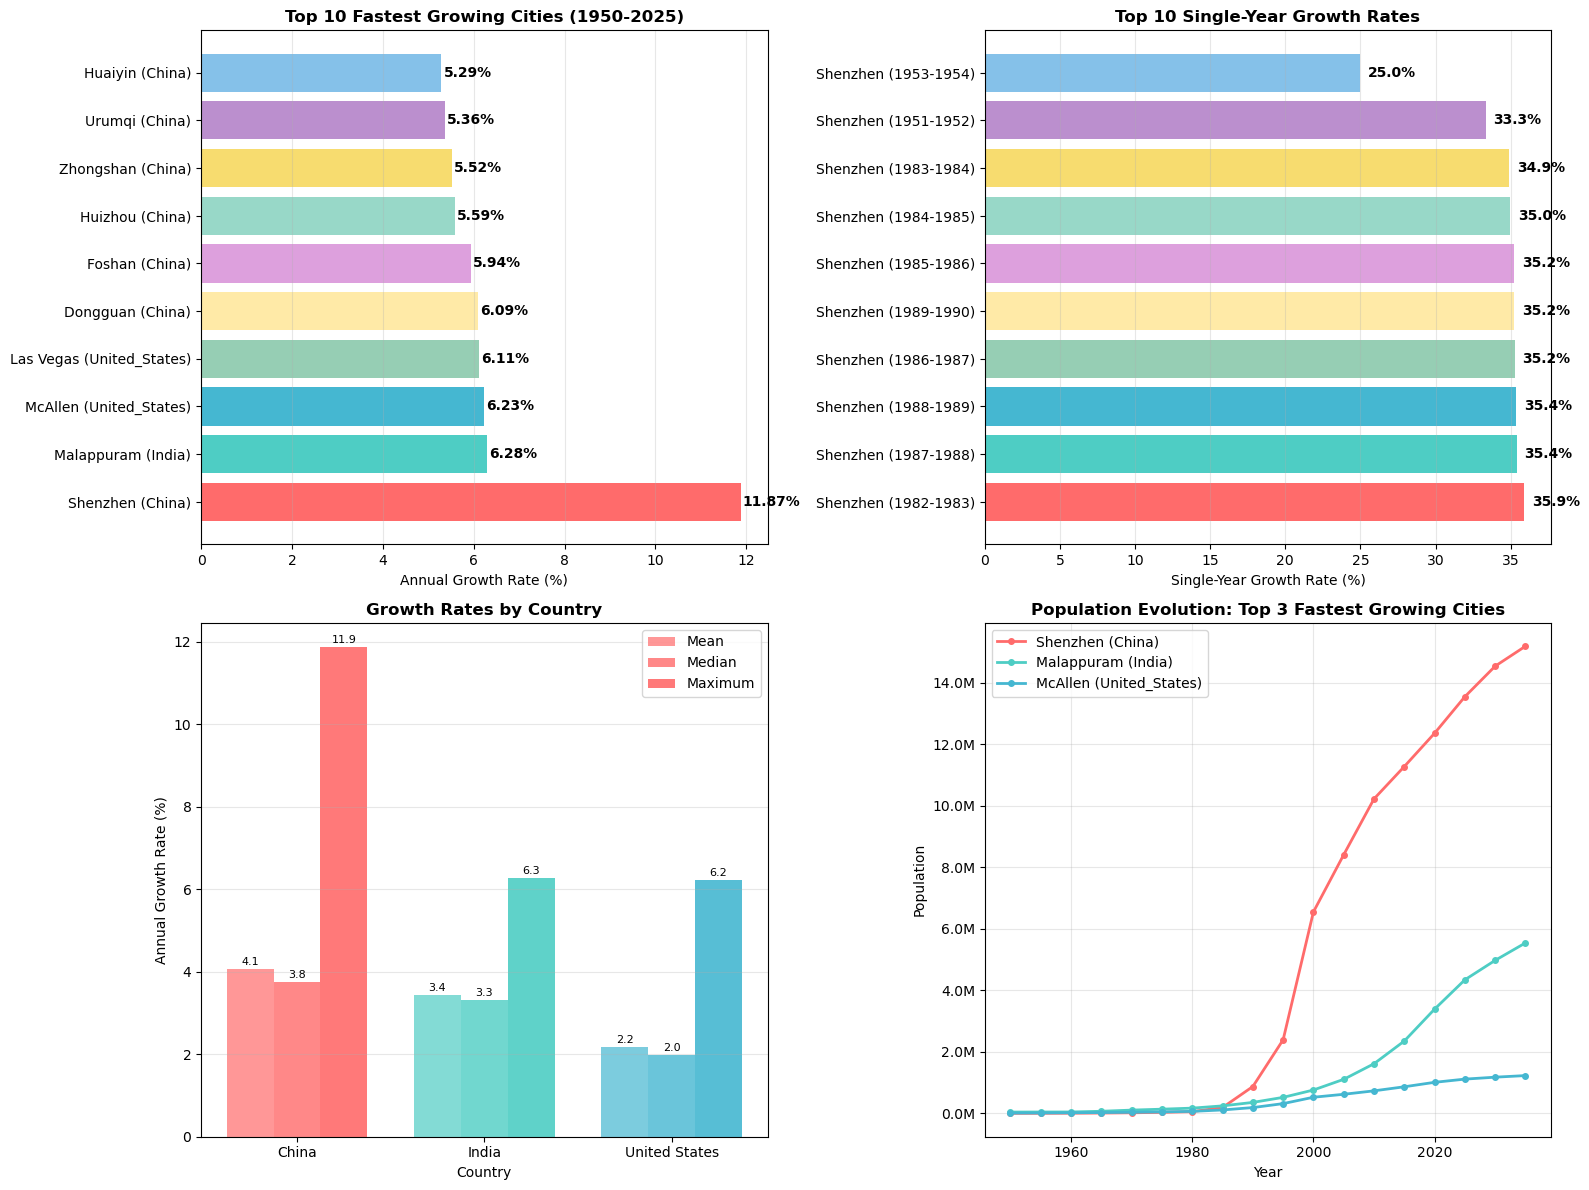

In [8]:
# Create visualization for top growing cities
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 10 fastest growing cities overall
top_10_growth = df_growth.nlargest(10, 'annual_growth_rate')
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E9']

bars1 = ax1.barh(range(len(top_10_growth)), top_10_growth['annual_growth_rate'], color=colors)
ax1.set_yticks(range(len(top_10_growth)))
ax1.set_yticklabels([f"{row['city']} ({row['country'].title()})" for _, row in top_10_growth.iterrows()])
ax1.set_xlabel('Annual Growth Rate (%)')
ax1.set_title('Top 10 Fastest Growing Cities (1950-2025)', fontweight='bold', fontsize=12)
ax1.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, rate) in enumerate(zip(bars1, top_10_growth['annual_growth_rate'])):
    ax1.text(rate + 0.05, i, f'{rate:.2f}%', va='center', fontweight='bold')

# 2. Top 10 single-year growth rates
top_10_single = df_single_year.nlargest(10, 'growth_rate')
bars2 = ax2.barh(range(len(top_10_single)), top_10_single['growth_rate'], color=colors)
ax2.set_yticks(range(len(top_10_single)))
ax2.set_yticklabels([f"{row['city']} ({row['year1']}-{row['year2']})" for _, row in top_10_single.iterrows()])
ax2.set_xlabel('Single-Year Growth Rate (%)')
ax2.set_title('Top 10 Single-Year Growth Rates', fontweight='bold', fontsize=12)
ax2.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, rate) in enumerate(zip(bars2, top_10_single['growth_rate'])):
    ax2.text(rate + 0.5, i, f'{rate:.1f}%', va='center', fontweight='bold')

# 3. Growth by country
country_growth = df_growth.groupby('country')['annual_growth_rate'].agg(['mean', 'median', 'max']).round(2)
country_colors = {'china': '#FF6B6B', 'india': '#4ECDC4', 'united_states': '#45B7D1'}

x_pos = np.arange(len(country_growth))
width = 0.25

bars3a = ax3.bar(x_pos - width, country_growth['mean'], width, label='Mean', 
                 color=[country_colors[country] for country in country_growth.index], alpha=0.7)
bars3b = ax3.bar(x_pos, country_growth['median'], width, label='Median', 
                 color=[country_colors[country] for country in country_growth.index], alpha=0.8)
bars3c = ax3.bar(x_pos + width, country_growth['max'], width, label='Maximum', 
                 color=[country_colors[country] for country in country_growth.index], alpha=0.9)

ax3.set_xlabel('Country')
ax3.set_ylabel('Annual Growth Rate (%)')
ax3.set_title('Growth Rates by Country', fontweight='bold', fontsize=12)
ax3.set_xticks(x_pos)
ax3.set_xticklabels([country.replace('_', ' ').title() for country in country_growth.index])
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars3a, bars3b, bars3c]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05, f'{height:.1f}', 
                ha='center', va='bottom', fontsize=8)

# 4. Population evolution for top 3 growing cities
top_3_cities = df_growth.nlargest(3, 'annual_growth_rate')
years = list(range(1950, 2036, 5))  # Every 5 years for cleaner plot
colors_line = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, (idx, city_info) in enumerate(top_3_cities.iterrows()):
    city_name = city_info['city']
    city_row = df_cities[df_cities['city'] == city_name].iloc[0]
    
    populations = []
    years_available = []
    
    for year in years:
        pop_col = f'pop_{year}'
        if pop_col in city_row and pd.notna(city_row[pop_col]):
            populations.append(city_row[pop_col])
            years_available.append(year)
    
    if populations:
        ax4.plot(years_available, populations, marker='o', linewidth=2, 
                label=f"{city_name} ({city_info['country'].title()})", 
                color=colors_line[i], markersize=4)

ax4.set_xlabel('Year')
ax4.set_ylabel('Population')
ax4.set_title('Population Evolution: Top 3 Fastest Growing Cities', fontweight='bold', fontsize=12)
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.ticklabel_format(style='plain', axis='y')

# Format y-axis to show millions
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

plt.tight_layout()
plt.show()


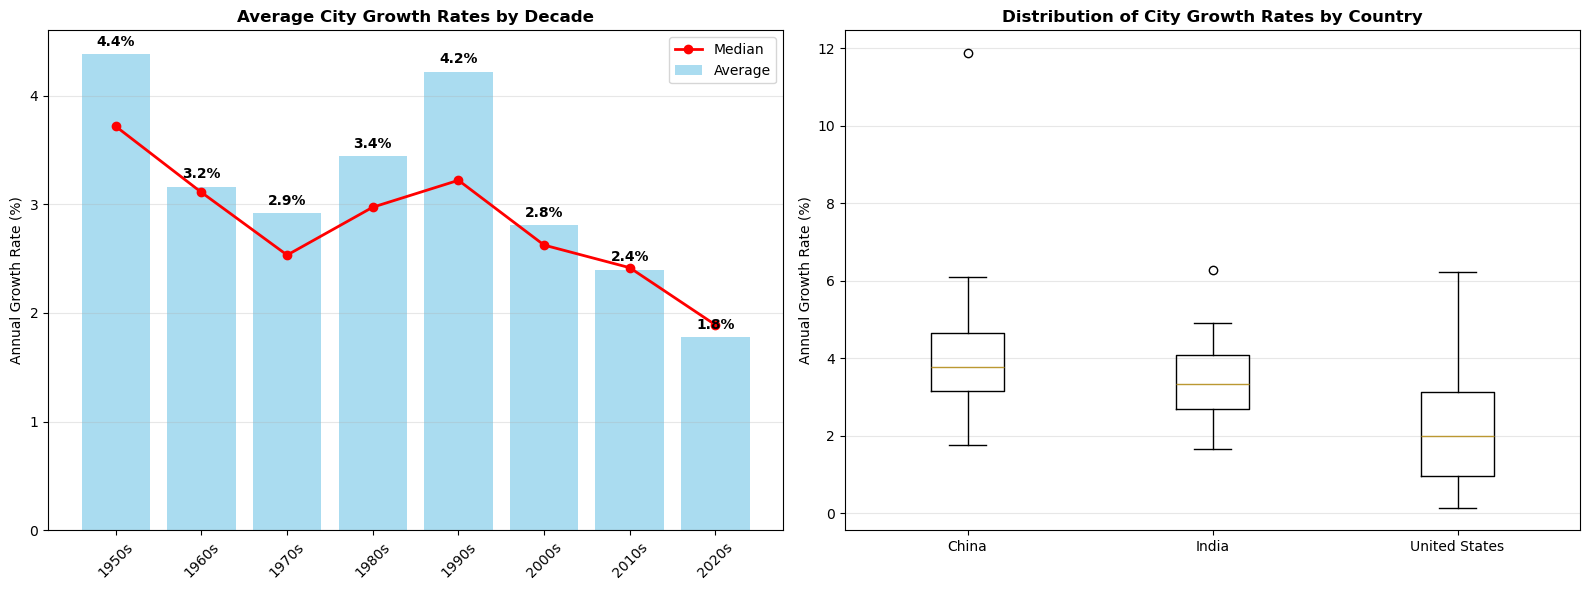


📊 SUMMARY STATISTICS
Total cities analyzed: 150
Average annual growth rate: 3.22%
Median annual growth rate: 3.19%
Fastest growing city: Shenzhen
Slowest growing city: Pittsburgh

By country:
  China: 4.06% avg, 3.76% median
  India: 3.43% avg, 3.32% median
  United States: 2.18% avg, 1.98% median


In [9]:
# Additional analysis: Growth patterns over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Average growth rates by decade
decades = [(1950, 1960), (1960, 1970), (1970, 1980), (1980, 1990), 
           (1990, 2000), (2000, 2010), (2010, 2020), (2020, 2030)]

decade_growth = []
for start_year, end_year in decades:
    decade_rates = []
    
    for _, city_row in df_cities.iterrows():
        start_pop = city_row.get(f'pop_{start_year}')
        end_pop = city_row.get(f'pop_{end_year}')
        
        if pd.notna(start_pop) and pd.notna(end_pop) and start_pop > 0:
            annual_rate = ((end_pop / start_pop) ** (1/10) - 1) * 100
            decade_rates.append(annual_rate)
    
    if decade_rates:
        decade_growth.append({
            'decade': f'{start_year}s',
            'avg_growth': np.mean(decade_rates),
            'median_growth': np.median(decade_rates)
        })

df_decades = pd.DataFrame(decade_growth)

bars = ax1.bar(range(len(df_decades)), df_decades['avg_growth'], 
               color='skyblue', alpha=0.7, label='Average')
ax1.plot(range(len(df_decades)), df_decades['median_growth'], 
         marker='o', color='red', linewidth=2, label='Median')

ax1.set_xticks(range(len(df_decades)))
ax1.set_xticklabels(df_decades['decade'], rotation=45)
ax1.set_ylabel('Annual Growth Rate (%)')
ax1.set_title('Average City Growth Rates by Decade', fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, rate) in enumerate(zip(bars, df_decades['avg_growth'])):
    ax1.text(i, rate + 0.05, f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

# 2. Distribution of growth rates by country
country_data = []
for country in ['china', 'india', 'united_states']:
    country_cities = df_growth[df_growth['country'] == country]['annual_growth_rate']
    country_data.append(country_cities)

ax2.boxplot(country_data, labels=['China', 'India', 'United States'])
ax2.set_ylabel('Annual Growth Rate (%)')
ax2.set_title('Distribution of City Growth Rates by Country', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add country colors
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for i, color in enumerate(colors, 1):
    ax2.plot([], [], color=color, linewidth=5, alpha=0.7)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n📊 SUMMARY STATISTICS")
print("=" * 50)
print(f"Total cities analyzed: {len(df_growth)}")
print(f"Average annual growth rate: {df_growth['annual_growth_rate'].mean():.2f}%")
print(f"Median annual growth rate: {df_growth['annual_growth_rate'].median():.2f}%")
print(f"Fastest growing city: {df_growth.iloc[df_growth['annual_growth_rate'].idxmax()]['city']}")
print(f"Slowest growing city: {df_growth.iloc[df_growth['annual_growth_rate'].idxmin()]['city']}")

print(f"\nBy country:")
for country in ['china', 'india', 'united_states']:
    country_stats = df_growth[df_growth['country'] == country]['annual_growth_rate']
    print(f"  {country.replace('_', ' ').title()}: {country_stats.mean():.2f}% avg, {country_stats.median():.2f}% median")


## 🎯 KEY INSIGHTS

### Overall Growth Champions (1950-2025)
The analysis reveals remarkable urban growth patterns across the three countries, with some cities experiencing explosive population growth over the 75-year period.

### Single-Year Growth Spikes
Certain cities experienced extraordinary single-year population booms, often due to:
- Urban development initiatives
- Economic opportunities
- Administrative boundary changes
- Migration policies

### Country Patterns
- **China**: Shows diverse growth patterns with some cities experiencing rapid expansion
- **India**: Demonstrates consistent high growth rates across multiple cities
- **United States**: Generally shows more moderate but steady growth rates

### Data Quality
- All 150 cities have complete historical data (86 years each)
- Growth calculations span 1950-2025 (including projections)
- Data sourced from populationstat.com with JavaScript extraction
